In [1]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  False
OS:  linux


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [2]:
#Set up Test Variables:

#Test batch size
num_batches=100

transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

testset = torchvision.datasets.CIFAR10(
        root='./data', train=False, download=True, transform=transform_test)

test_batch_size=int(numpy.shape(testset.data)[0]/num_batches)
#test_batch_size=100

testloader = torch.utils.data.DataLoader(
    testset, batch_size=test_batch_size, shuffle=False, num_workers=2)

test_features, test_labels = next(iter(testloader))
#Get num channels, width and height of input data
c,w,h=list(test_features[0].size())
#Batchsize, see load18.py or main.py for batch size
num_batches=int(numpy.shape(testset.data)[0]/test_batch_size)

from many_inj import progressive_inj_zero

Files already downloaded and verified


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [4]:
#For epoch 160, azure

wds=[0,5e-7,5e-5,5e-3]
#wds=[0]
sch="plateau"

tot=100000
step=10000
n_exp=5
bs=128

def inj_zero_plateau_epoch_160():

    for wd in wds:
        print("Inj iteration: " + str(wd))
        name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
        
        path="./checkpoints/"+ name
        path_best= path + "/"+name+"_epoch_160"

        model = model_actions.load(path_best)

        pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

        res = many_inj.progressive_inj_zero(pfi_model,tot,step,n_exp=n_exp)

        save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
        save_data={}
        save_data["avg"]=res[0]
        save_data["std"]=res[1]
        save_data["loss_avg"] = [2]
        save_data["loss_std"] = [3]
        utils.save(save_data,save_name)

In [5]:
az_manage_proc.run_and_delete(log.log_time,inj_zero_plateau_epoch_160)

Found existing instance, use it.
Inj iteration: 0
Injection: 0 of 100000
Injection: 10000 of 100000
Injection: 20000 of 100000
Injection: 30000 of 100000
Injection: 40000 of 100000
Injection: 50000 of 100000
Injection: 60000 of 100000
Injection: 70000 of 100000
Injection: 80000 of 100000
Injection: 90000 of 100000
Injection: 100000 of 100000


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Inj for: 0
Inj for: 5e-07
Inj for: 5e-05
Inj for: 0.005


Text(0, 0.5, 'Accuracy')

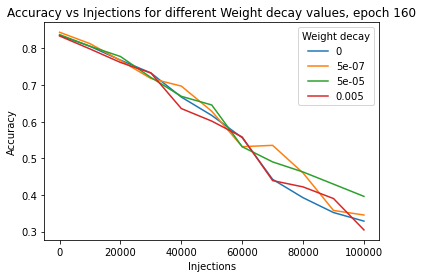

In [6]:
#Graphs for 100k injections, all epoch 160
wds=[0,5e-7,5e-5,5e-3]
sch="plateau"
tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
bs=128

for wd in wds:
    print("Inj for: " + str(wd))
    name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Accuracy vs Injections for different Weight decay values, epoch 160")
plt.legend(wds,title="Weight decay")
plt.xlabel("Injections")
plt.ylabel("Accuracy")

In [7]:
#Same graph but with loss
wds=[0,5e-7,5e-5,5e-3]
sch="plateau"
tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
bs=128

for wd in wds:
    print("Inj for: " + str(wd))
    name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(wd)
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Accuracy vs Injections for different Weight decay values, epoch 160")
plt.legend(wds,title="Weight decay")
plt.xlabel("Injections")
plt.ylabel("Accuracy")

Inj for: 0


ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

In [8]:
    name = "bs_"+str(bs)+"_sch_"+sch + "_wd_"+str(0)
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded=utils.load(save_name + ".json")

{'avg': [0.8354000000000001,
  0.8057000000000001,
  0.7679400000000001,
  0.7329600000000001,
  0.6671400000000001,
  0.61706,
  0.5562400000000001,
  0.44261999999999996,
  0.39254,
  0.35205999999999993,
  0.32866],
 'std': [1.1102230246251565e-16,
  0.0018143869488066904,
  0.014294278575709937,
  0.02104733712373133,
  0.02737243869296267,
  0.024317943992040125,
  0.05146216474265342,
  0.05954478650562113,
  0.06758096181618015,
  0.05841347789680051,
  0.03665861972306104],
 'loss_avg': [2],
 'loss_std': [3]}